## House Price Prediction - Model Training

#### Overview
This notebook trains and evaluates machine learning models for predicting house prices using the Ames Housing dataset. Two models are implemented: Linear Regression and Random Forest Regressor.

#### 1. Importing Necessary Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Loading and Exploring the Dataset

In [14]:
# Load the dataset
df = pd.read_csv("dataset/train.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [15]:
# checking missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] # Only show columns with missing values
print(missing_values)
df.describe() # to understand basic statistics
df.info()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   objec

#### 3. Handling Missing Values

In [16]:
# fill numerical columns with median
num_col = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]
for col in num_col:
    df[col] = df[col].fillna(df[col].median())
    
# fill categorical columns with mode i,e most common value
cat_col = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
            "BsmtFinType2", "Electrical", "GarageType", "GarageFinish",
            "GarageQual", "GarageCond"]

for col in cat_col:
    df[col] = df[col].fillna(df[col].mode()[0])
    
#fill features where missing values means "None"
none_cols = ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]
for col in none_cols:
    df[col] = df[col].fillna("None")

print("Missing values after handling: ", df.isnull().sum().sum())

Missing values after handling:  0


#### 4. Feature Engineering and Selection

In [17]:
# drop columns that are not useful for prediction
df.drop(columns=["Id", "MiscFeature", "Utilities"],inplace=True)

# selecting only 10 relevant features for prediction
selected_features = ["LotArea", "OverallQual", "OverallCond", "YearBuilt", "TotalBsmtSF", "GrLivArea", "FullBath", "HalfBath", "GarageCars", "GarageArea"]

df = df[selected_features + ["SalePrice"]] # Keep target variable

#### 5. Splitting Data into Training and Testing Sets
80% of data is used for training and 20% for testing.

In [18]:
from sklearn.model_selection import train_test_split
X = df[selected_features] # independent variable
y = df["SalePrice"] # output/target variable 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:",X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1168, 10)
Testing data shape: (292, 10)


#### 6. Training a Linear Regression Model
The model is trained using LinearRegression().

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### 7. Evaluating the Linear Regression Model

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# make predictions on test data
y_predict = model.predict(X_test)

# calculating performance metrics
mae = mean_absolute_error(y_test,y_predict) #mean absolute error
mse = mean_squared_error(y_test,y_predict) # mean squared error
rmse = mse ** 0.5 # root mean squared error
r2 = r2_score(y_test,y_predict) # R square score

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 23420.40
Root Mean Squared Error: 38789.07
R² Score: 0.8038


#### 8. Saving the Linear Regression Model
The trained model is saved using joblib.

In [21]:
import joblib
joblib.dump(model, "model/house_price_model.pkl")
print("Linear Regression Model saved successfully")

Linear Regression Model saved successfully


#### 9. Training a Random Forest Model
RandomForestRegressor(n_estimators=100, random_state=42) is used.

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

# Make prediction with Random Forest
rf_y_predict = rf_model.predict(X_test)

# Evaluating the performance metrices of Random Forest model
rf_mae = mean_absolute_error(y_test,rf_y_predict) #mean absolute error
rf_mse = mean_squared_error(y_test, rf_y_predict) # mean squared error
rf_rmse = rf_mse ** 0.5  # root mean squared error
rf_r2 = r2_score(y_test, rf_y_predict) # R square score

print(f"Mean Absolute Error: {rf_mae:.2f}")
print(f"Root Mean Squared Error: {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.4f}")

# Save the Random Forest model
joblib.dump(rf_model, "model/house_price_rf_model.pkl")
print("Random Forest Model saved successfully.")

Mean Absolute Error: 17703.41
Root Mean Squared Error: 28451.38
R² Score: 0.8945
Random Forest Model saved successfully.


#### 10. Visualization of Model Performance
##### 1. Actual vs. Predicted prices (Scatter Plot)
##### Scatter plot to visualize model accuracy. If points are close to a straight line, the model is performing well.

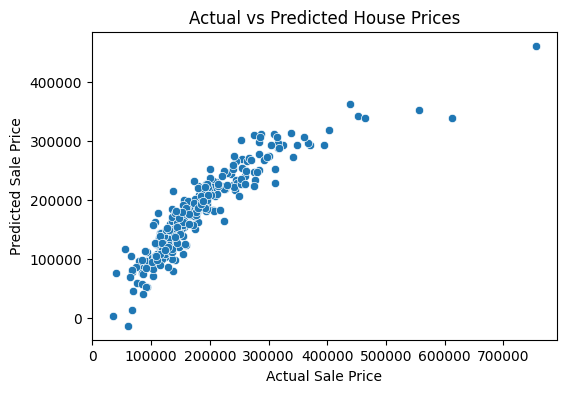

In [23]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_predict)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


##### 2. Feature Importance (Random Forest)
Bar plot to show the importance of each feature.

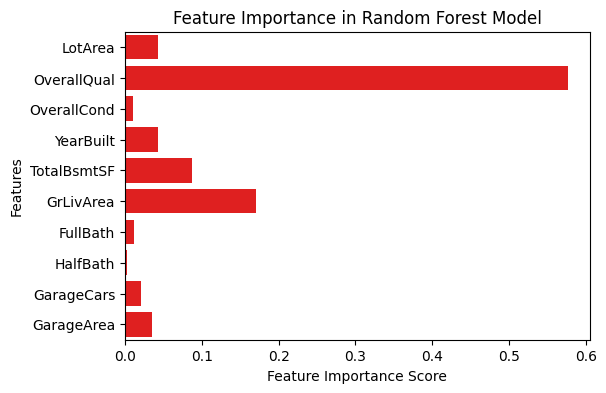

In [24]:
# Feature Importance (For Random Forest)
feature_importances = rf_model.feature_importances_  
features = X_train.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances, y=features, color="red")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()
